In [1]:
import pandas as pd 
import numpy as np 


In [29]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [30]:
df=df.drop(columns=['Serial No.'])


In [6]:
df.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [7]:
df.shape

(500, 8)

In [8]:
df.info

<bound method DataFrame.info of      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                0.

In [9]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
df.duplicated().sum()

0

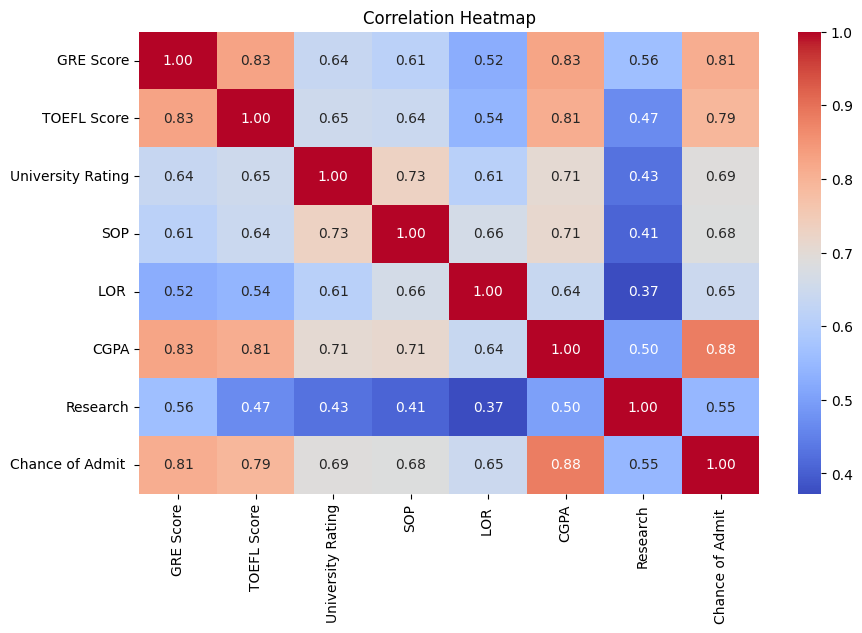

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

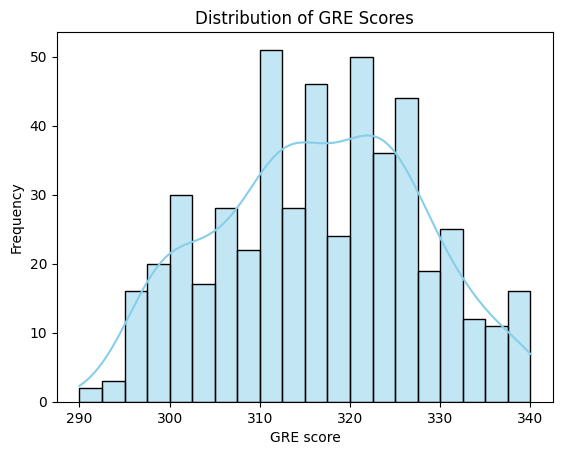

In [17]:
sns.histplot(df['GRE Score'],bins=20,kde=True,color='skyblue')
plt.title('Distribution of GRE Scores')
plt.xlabel("GRE score")
plt.ylabel("Frequency")
plt.show()

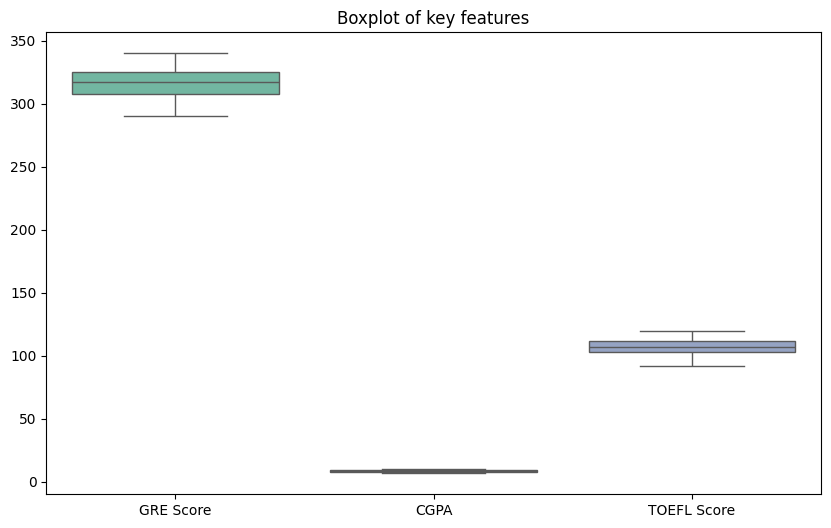

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['GRE Score','CGPA','TOEFL Score']],palette='Set2')
plt.title("Boxplot of key features")
plt.show()

After a careful review of these plots, it was observed that:
The data shows no significant outliers.

The distributions across all features fall within expected ranges.

This indicates the dataset is clean and does not require outlier handling at this stage.

This clean behavior helps ensure smoother training for deep learning models, as they tend to be sensitive to extreme values in input data.

Conclusion: No outlier removal was necessary, and all values were retained for model training.

###  Data Preprocessing Steps 
Handled any missing/null values

Normalized all numerical features using MinMaxScaler

Converted binary features (like research) into numerical format if required

Split dataset into train and test sets (80-20)




In [31]:
df.tail(2)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [34]:
df.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [35]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [37]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [39]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [42]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [44]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

##### Importing Libraries for creating Deep Learning Neural Network
.Tensorflow

.Keras

.Keras Sequential Model

.Keras.layers Dense


In [47]:
import tensorflow

In [48]:
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Input

Designing Simple Artificial Neural Network model¶
Model Architecture: Artificial Neural Network (ANN)

For this project, I designed a deep learning model using an Artificial Neural Network (ANN) to predict GRE scores based on various input features.

Hidden Layers:¶
The ANN has 2 hidden layers, each containing a specific number of neurons (you can mention exact numbers if you want) For this case the First hidden layer has 7 and In second layer its 5.
These layers help the model learn complex, non-linear relationships within the data.
Activation functions I used is ReLU (Rectified Linear Unit) this activation function i used here to introduce non-linearity and improve learning capabilities.

In [51]:
model=Sequential()
model.add(Input(shape=(7,)))  #Input Layer 
model.add(Dense(7,activation='relu')) #First hidden layer with 7 input layers
model.add(Dense(5,activation='relu')) #second hidden layer with 5 input layers
model.add(Dense(1,activation='linear')) #Output layer with single data input for final prediction

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102 (408.00 B)

 Trainable params: 102 (408.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [54]:
history=model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.3426 - val_loss: 1.2047
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0667 - val_loss: 1.0078
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9111 - val_loss: 0.8462
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7135 - val_loss: 0.7203
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6475 - val_loss: 0.6235
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5387 - val_loss: 0.5497
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4779 - val_loss: 0.4938
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4463 - val_loss: 0.4477
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3981 - val_loss: 0.4019
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3522 - val_loss: 0.3420


In [55]:
y_predicted=model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [56]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predicted)

-16.628066275603693

# -16 is my accuracy ??


In [57]:
# Lets train further more

In [58]:
history=model.fit(X_train_scaled,y_train,epochs=150,validation_split=0.2)

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2828 - val_loss: 0.2685
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2455 - val_loss: 0.1906
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1439 - val_loss: 0.1242
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0941 - val_loss: 0.0803
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0738 - val_loss: 0.0585
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0503 - val_loss: 0.0507
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0460 - val_loss: 0.0472
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0446 - val_loss: 0.0443
Epoch 9/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0368 - val_loss: 0.0415
Epoch 10/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0364 - val_loss: 0.0389
Epoch 11/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 - val_loss: 0.0366
Epoch 12/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

In [59]:
y_predicted=model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [60]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predicted)

0.7928825362536905

In [61]:
#Some improvement finally after improving epochs

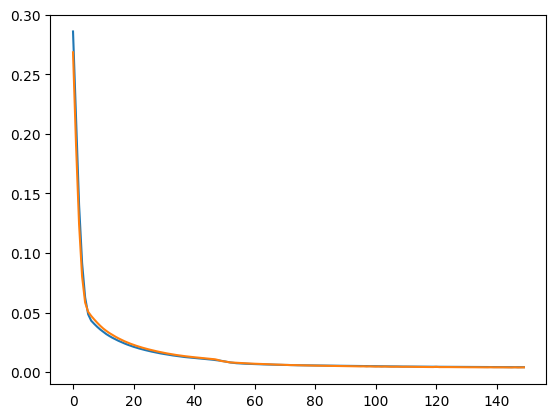

In [62]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


Performance and Improvements
This ANN setup improved the R² score from -16 to 0.79, demonstrating better predictive power.

Both training loss and validation loss decrease consistently over epochs, indicating effective learning without overfitting.

The deep learning model captures complex patterns in the dataset that simpler algorithms might miss, improving accuracy and robustness.

## CONCLUSION
This ANN architecture balances depth and complexity, making it well-suited for regression tasks with structured data like GRE score prediction. Further tuning and experimentation with layers and epochs may yield even better results.